In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [45]:
data=pd.read_csv("example_retail_sales.csv",parse_dates=['ds'],index_col=['ds'])

In [46]:
data.head()

,y
ds,
1992-01-01,146376
1992-02-01,147079
1992-03-01,159336
1992-04-01,163669
1992-05-01,170068


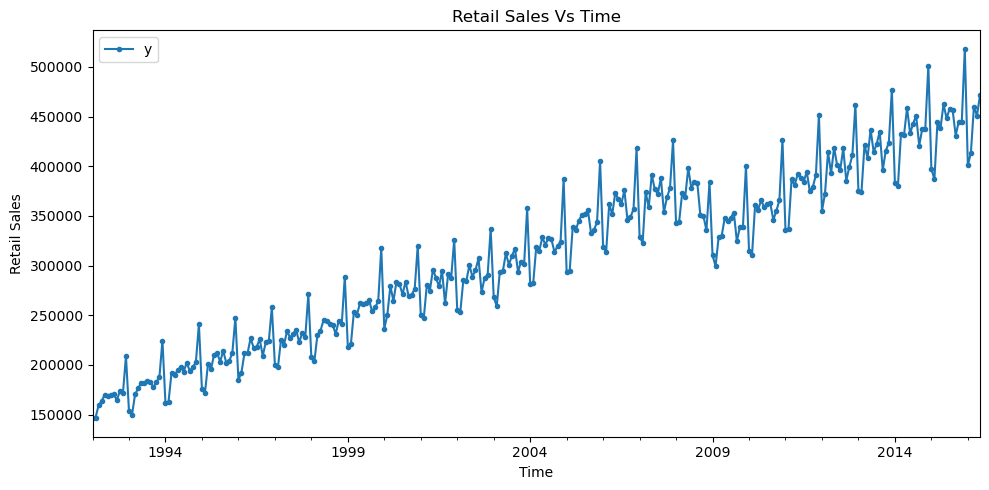

In [47]:
fig,ax=plt.subplots(figsize=[10,5])
data.plot(ax=ax,marker=".")
ax.set_xlabel("Time")
ax.set_ylabel("Retail Sales")
ax.set_title("Retail Sales Vs Time")
plt.tight_layout()

# Classical Decomposition
 
# Firstly trend


here the data changes every month and we observe yearly seasonality.


In [48]:
window_size=12
data["trend"]=data.rolling(window=window_size).mean().rolling(window=2).mean().shift(-window_size//2)

# De trend data

In [49]:
data["y_deterended"]=data['y']-data["trend"]

# Avarage of detrend data permonth

In [50]:
data["month"]=data.index.month

In [51]:
data.head()

,y,trend,y_deterended,month
ds,,,,
1992-01-01,146376,NaN,NaN,1
1992-02-01,147079,NaN,NaN,2
1992-03-01,159336,NaN,NaN,3
1992-04-01,163669,NaN,NaN,4
1992-05-01,170068,NaN,NaN,5


In [52]:
seasonality=data.groupby("month").mean()["y_deterended"]

In [54]:
seasonality.name="seasonality"
seasonality

month
1    -31085.898551
2    -32941.297101
3      3032.637681
4     -2933.978261
5     13554.688406
6      4457.835145
7      4140.364583
8     10267.178819
9    -11945.057292
10    -3233.472222
11    -1135.296875
12    47751.626812
Name: seasonality, dtype: float64

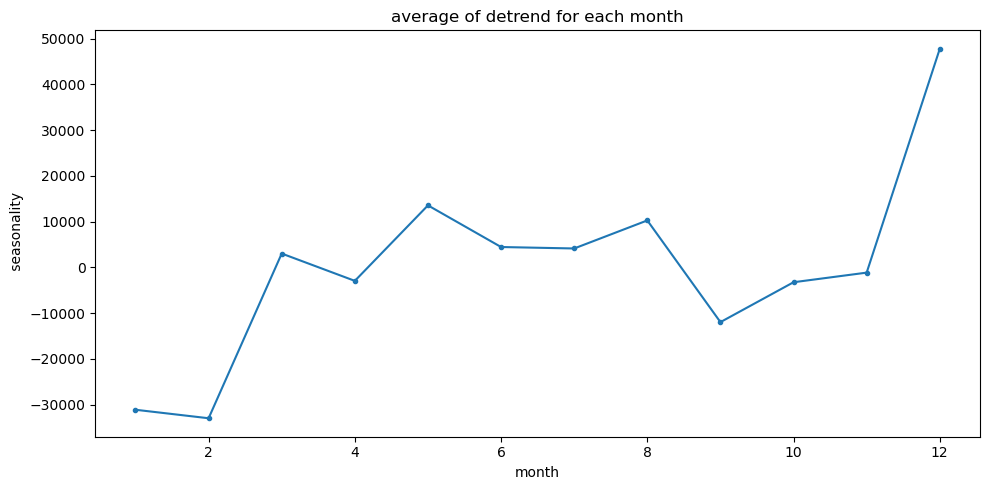

In [60]:
fig,ax=plt.subplots(figsize=[10,5])
seasonality.plot(y="seasonality",ax=ax,marker=".")
ax.set_xlabel("month")
ax.set_ylabel(" seasonality")
ax.set_title("average of detrend for each month")
plt.tight_layout()

# Repeat seasonal pattern each year

In [62]:
data = data.merge(right=seasonality, left_on="month", right_index=True)
data =data.sort_index()
data.head()

,y,trend,y_deterended,month,seasonality
ds,,,,,
1992-01-01,146376,NaN,NaN,1,-31085.898551
1992-02-01,147079,NaN,NaN,2,-32941.297101
1992-03-01,159336,NaN,NaN,3,3032.637681
1992-04-01,163669,NaN,NaN,4,-2933.978261
1992-05-01,170068,NaN,NaN,5,13554.688406


# Computing Resididual Component

In [63]:
data["residual"]=data['y']-data['trend']-data['seasonality']

In [64]:
df=data.copy()

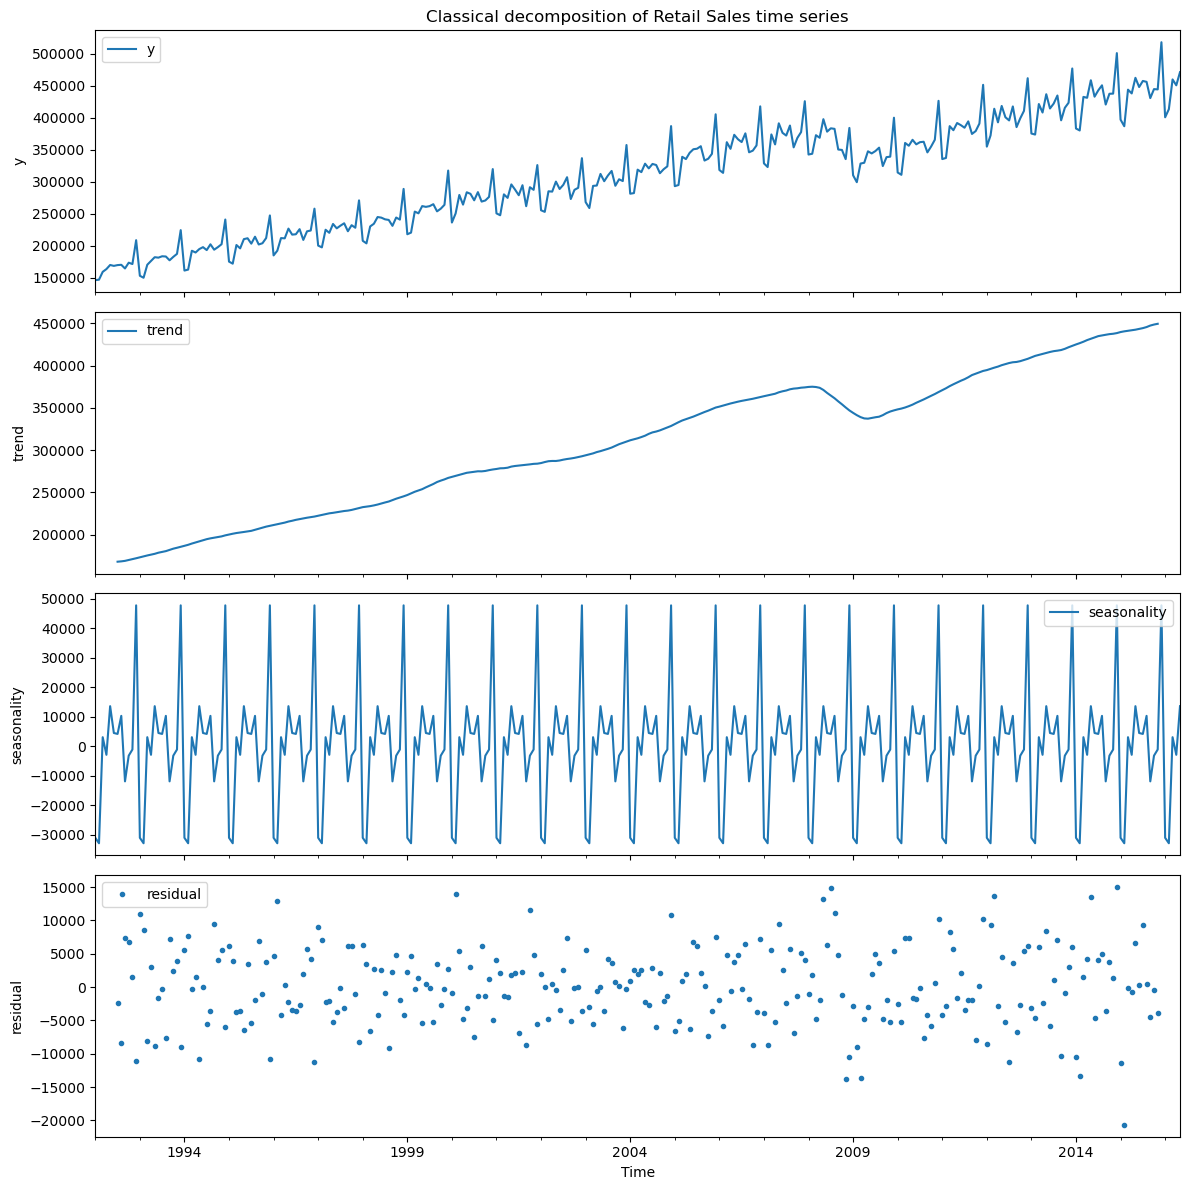

In [65]:
fig, ax = plt.subplots(nrows=4, figsize=[12, 12], sharex=True)

df["y"].plot(ax=ax[0], legend="y")
ax[0].set_ylabel("y")

df["trend"].plot(ax=ax[1], legend="trend")
ax[1].set_ylabel("trend")

df["seasonality"].plot(ax=ax[2], legend="seasonality")
ax[2].set_ylabel("seasonality")

df["residual"].plot(ax=ax[3], marker=".", legend="residual", ls="None")
ax[3].set_ylabel("residual")

ax[0].set_title("Classical decomposition of Retail Sales time series")
ax[3].set_xlabel("Time")

plt.tight_layout()

# Classical decompositon using statsmodel

In [69]:
resid = seasonal_decompose(x=df["y"], model="additive", period=12)

In [70]:
resid

In [71]:
resid.trend.head(10)

ds
1992-01-01              NaN
1992-02-01              NaN
1992-03-01              NaN
1992-04-01              NaN
1992-05-01              NaN
1992-06-01              NaN
1992-07-01    168127.041667
1992-08-01    168537.583333
1992-09-01    169125.541667
1992-10-01    170120.958333
Name: trend, dtype: float64

In [74]:
resid.seasonal.head()

ds
1992-01-01   -31080.009479
1992-02-01   -32935.408030
1992-03-01     3038.526752
1992-04-01    -2928.089190
1992-05-01    13560.577477
Name: seasonal, dtype: float64

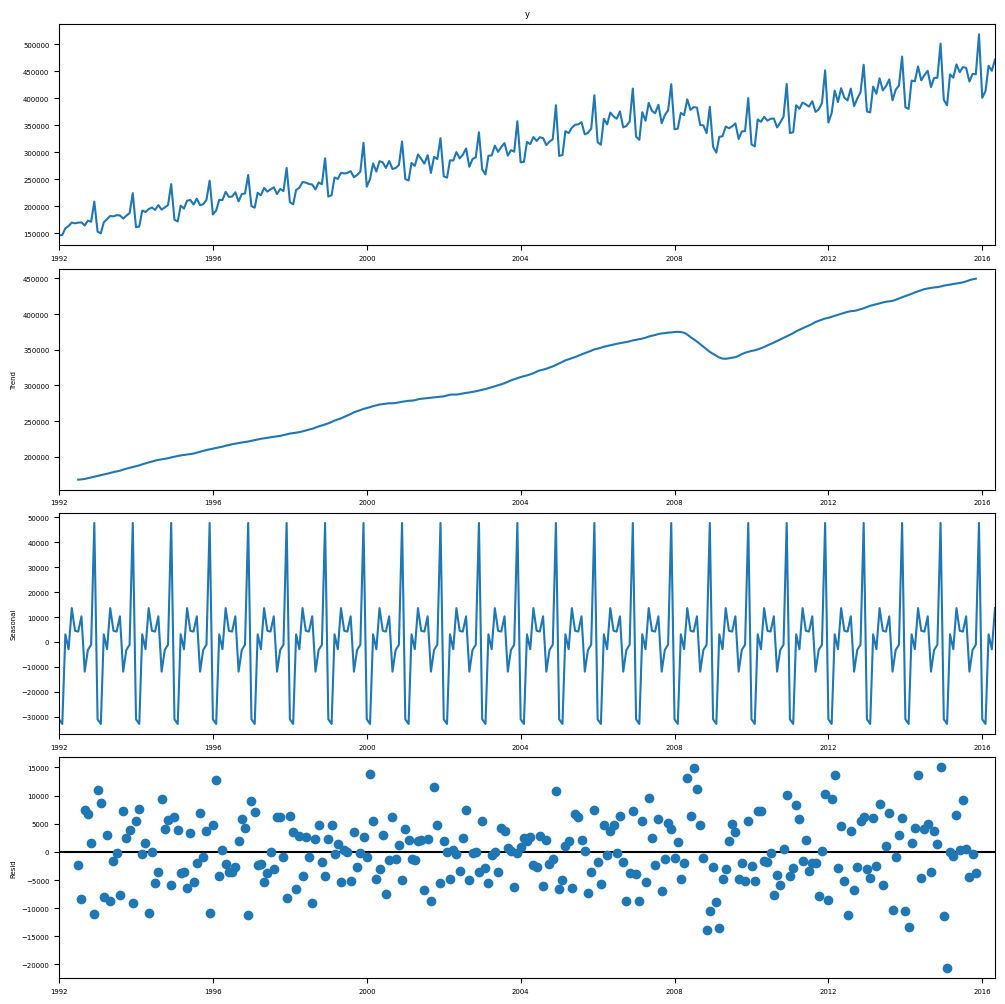

In [75]:
plt.rc("figure", figsize=(10, 10))
plt.rc("font", size=5)
resid.plot();